# Weather Forecasting Tool using ARIMA


In [ ]:

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.stattools import adfuller
import warnings

warnings.filterwarnings("ignore")
plt.style.use('ggplot')  # Using a built-in matplotlib style

In [9]:

# Step 2: Load Dataset
# Ensure the 'DailyDelhiClimateTrain.csv' file is in your working directory
df = pd.read_csv("DailyDelhiClimateTrain.csv")

# Preview dataset
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB
None
         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


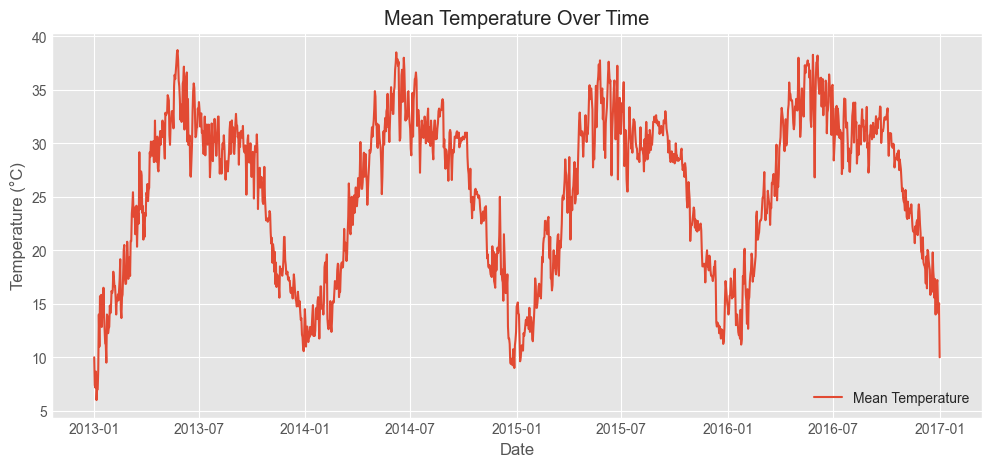

In [10]:
# Step 3: Preprocessing and Cleaning
# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Focus only on the 'meantemp' column
df = df[['meantemp']]

# Drop missing values
df.dropna(inplace=True)

# Plot temperature trend
plt.figure(figsize=(12, 5))
plt.plot(df['meantemp'], label='Mean Temperature')
plt.title('Mean Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [11]:
# Step 4: Stationarity Check
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] <= 0.05:
        print("=> The series is stationary.")
    else:
        print("=> The series is not stationary.")

adf_test(df['meantemp'])

ADF Statistic: -2.0210690559206728
p-value: 0.27741213723016056
=> The series is not stationary.


ADF Statistic: -16.378720267074723
p-value: 2.764863137594368e-29
=> The series is stationary.


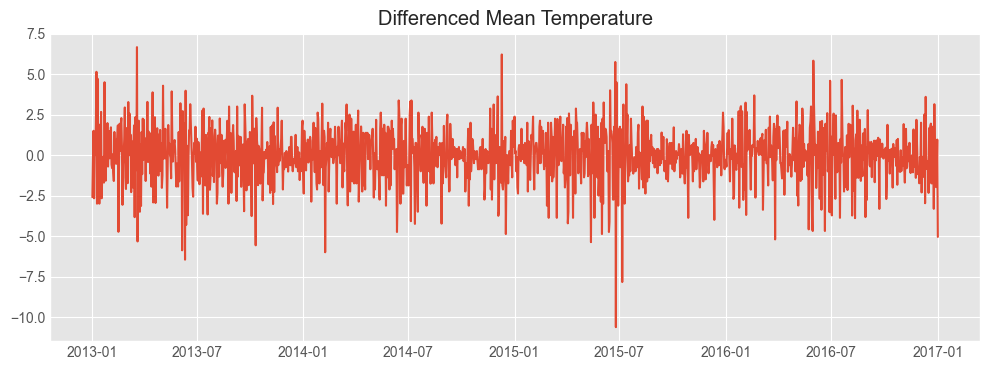

In [12]:
# Step 5: Differencing to make stationary
temperature = df['meantemp']
temperature_diff = temperature.diff().dropna()

# Check stationarity again
adf_test(temperature_diff)

# Plot differenced series
plt.figure(figsize=(12, 4))
plt.plot(temperature_diff, label='Differenced Temperature')
plt.title('Differenced Mean Temperature')
plt.show()

In [13]:
# Step 6: Train-Test Split
train_size = int(len(temperature_diff) * 0.8)
train, test = temperature_diff[:train_size], temperature_diff[train_size:]

# Step 7: Fit ARIMA model
model = sm.tsa.ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Step 8: Forecast on test set
forecast = model_fit.forecast(steps=len(test))
forecast = pd.Series(forecast, index=test.index)

# Evaluate with RMSE
rmse = sqrt(mean_squared_error(test, forecast))
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1.7521181858497465


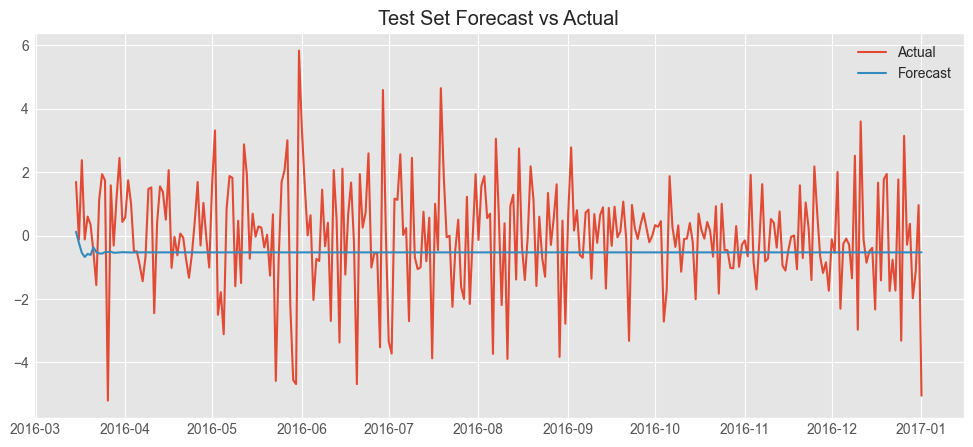

In [14]:
# Plot actual vs forecast
plt.figure(figsize=(12, 5))
plt.plot(test, label='Actual')
plt.plot(forecast, label='Forecast')
plt.title('Test Set Forecast vs Actual')
plt.legend()
plt.show()

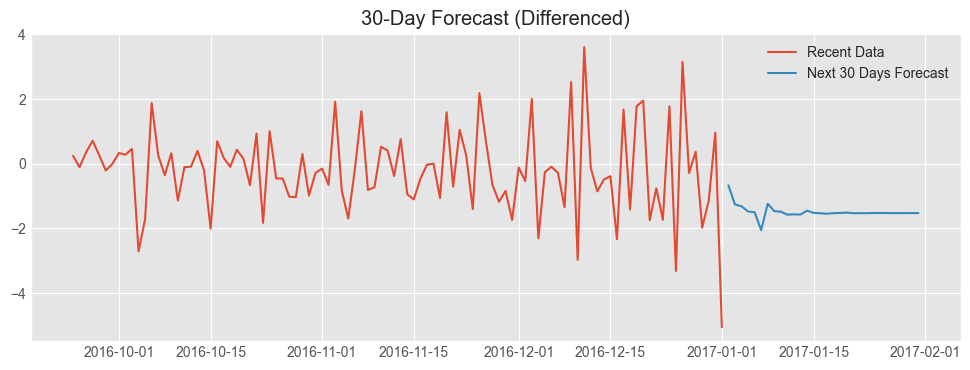

In [15]:
# Step 9: Forecast Future Values
# Retrain model on full data
full_model = sm.tsa.ARIMA(temperature_diff, order=(5, 1, 0))
full_fit = full_model.fit()

# Forecast next 30 days
forecast_30 = full_fit.forecast(steps=30)
forecast_30.index = pd.date_range(start=temperature_diff.index[-1] + pd.Timedelta(days=1), periods=30)

# Plot future forecast
plt.figure(figsize=(12, 4))
plt.plot(temperature_diff[-100:], label='Recent Data')
plt.plot(forecast_30, label='Next 30 Days Forecast')
plt.title('30-Day Forecast (Differenced)')
plt.legend()
plt.show()

In [16]:
# Step 10: Summary
print("Summary:")
print("- ARIMA(5,1,0) was used for temperature forecasting.")
print(f"- RMSE on test set: {rmse}")
print("- Forecasted temperature trend for the next 30 days.")


Summary:
- ARIMA(5,1,0) was used for temperature forecasting.
- RMSE on test set: 1.7521181858497465
- Forecasted temperature trend for the next 30 days.


---

###  Contact Me

Feel free to reach out or follow me on social media:

- 📸 Instagram: [@su_codz](https://www.instagram.com/su_codz/)
- 🌐 porfolio: [Soulef Bentorki](https://soulefbentorki.netlify.app)
- 💼 Shop: [education shop](https://ko-fi.com/soulefbentorki)
- 💻 Github: [sucodz](https://github.com/sucodz)


_Thank you for checking out this notebook!_
---